In [1]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

In [2]:
data = nc.Dataset('AirT.nc')

In [3]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121012
    title: monthly mean air.2m from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 16-Jun-2023 03:11:00 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(192), lat(94)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 air(time, lat, lon)
    groups: 

In [4]:
air = data.variables['air']
print(air)

<class 'netCDF4._netCDF4.Variable'>
float32 air(time, lat, lon)
    long_name: Monthly Mean of Air Temperature
    units: degK
    CDI_grid_type: gaussian
    CDI_grid_num_LPE: 47
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 1
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    level_desc: 2 m
    statistic: Mean
    parent_stat: Individual Obs
    dataset: NCEP Reanalysis Derived Products
    actual_range: [187.4545  314.80725]
unlimited dimensions: time
current shape = (708, 94, 192)
filling off


In [5]:
air[:]

masked_array(
  data=[[[242.67839, 242.67741, 242.65549, ..., 242.74127, 242.71709,
          242.69644],
         [243.68414, 243.68127, 243.67902, ..., 243.6503 , 243.6819 ,
          243.69708],
         [245.25447, 245.32898, 245.41322, ..., 245.10028, 245.16899,
          245.2345 ],
         ...,
         [257.8329 , 258.05096, 258.26257, ..., 257.24097, 257.42807,
          257.6313 ],
         [258.0322 , 258.11777, 258.2148 , ..., 257.84323, 257.89645,
          257.9648 ],
         [257.93512, 257.9254 , 257.91937, ..., 257.96323, 257.95227,
          257.9429 ]],

        [[237.96216, 237.95569, 237.9528 , ..., 237.955  , 237.94217,
          237.96141],
         [237.40498, 237.54497, 237.67213, ..., 236.95248, 237.09282,
          237.2539 ],
         [238.65605, 238.98608, 239.29248, ..., 237.69926, 238.01817,
          238.34322],
         ...,
         [234.59033, 234.6957 , 234.79604, ..., 234.65785, 234.5586 ,
          234.54285],
         [235.72789, 235.5986 , 235.

In [6]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 88.542 -88.542]
unlimited dimensions: 
current shape = (94,)
filling off


In [7]:
latitude[:]

masked_array(data=[ 88.542   ,  86.6531  ,  84.7532  ,  82.8508  ,
                    80.9473  ,  79.0435  ,  77.1394  ,  75.2351  ,
                    73.3307  ,  71.4262  ,  69.5217  ,  67.6171  ,
                    65.7125  ,  63.8079  ,  61.9033  ,  59.9986  ,
                    58.0939  ,  56.1893  ,  54.2846  ,  52.3799  ,
                    50.4752  ,  48.5705  ,  46.6658  ,  44.7611  ,
                    42.8564  ,  40.9517  ,  39.047   ,  37.1422  ,
                    35.2375  ,  33.3328  ,  31.4281  ,  29.5234  ,
                    27.6186  ,  25.7139  ,  23.8092  ,  21.9044  ,
                    19.9997  ,  18.095   ,  16.1902  ,  14.2855  ,
                    12.3808  ,  10.47604 ,   8.57131 ,   6.66657 ,
                     4.76184 ,   2.8571  ,   0.952368,  -0.952368,
                    -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 ,
                   -10.47604 , -12.3808  , -14.2855  , -16.1902  ,
                   -18.095   , -19.9997  , -21.9044  , -23.809

In [8]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.    358.125]
unlimited dimensions: 
current shape = (192,)
filling off


In [9]:
longitude[:]

masked_array(data=[  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,
                    11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
                    22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,
                    33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
                    45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,
                    56.25 ,  58.125,  60.   ,  61.875,  63.75 ,  65.625,
                    67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,
                    78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
                    90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375,
                   101.25 , 103.125, 105.   , 106.875, 108.75 , 110.625,
                   112.5  , 114.375, 116.25 , 118.125, 120.   , 121.875,
                   123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
                   135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375,
                   146.25 , 148.125, 150.   , 151.8

In [10]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
air_subset = data['air'][start_index:, :, :]

In [11]:
data_ = np.array(air_subset)
data_[data_ == -9.96921e+36] = 0

In [12]:
for date in time_dates:
    print(date)

1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00
1960-03-01 00:00:00
1960-04-01 00:00:00
1960-05-01 00:00:00
1960-06-01 00:00:00
1960-07-01 00:00:00
1960-08-01 00:00:00
1960-09-01 00:00:00
1960-10-01 00:00:00
1960-11-01 00:00:00
1960-12-01 00:00:00
1961-01-01 00:00:00
1961-02-01 00:00:00
1961-03-01 00:00:00
1961-04-01 00:00:00
1961-05-01 00:00:00
1961-06-01 00:00:00
1961-07-01 00:00:00
1961-08-01 00:00:00
1961-09-01 00:00:00
1961-10-01 00:00:00
1961-11-01 00:00:00
1961-12-01 00:00:00
1962-01-01 00:00:00
1962-02-01 00:00:00


In [13]:
data_

array([[[242.67839, 242.67741, 242.65549, ..., 242.74127, 242.71709,
         242.69644],
        [243.68414, 243.68127, 243.67902, ..., 243.6503 , 243.6819 ,
         243.69708],
        [245.25447, 245.32898, 245.41322, ..., 245.10028, 245.16899,
         245.2345 ],
        ...,
        [257.8329 , 258.05096, 258.26257, ..., 257.24097, 257.42807,
         257.6313 ],
        [258.0322 , 258.11777, 258.2148 , ..., 257.84323, 257.89645,
         257.9648 ],
        [257.93512, 257.9254 , 257.91937, ..., 257.96323, 257.95227,
         257.9429 ]],

       [[237.96216, 237.95569, 237.9528 , ..., 237.955  , 237.94217,
         237.96141],
        [237.40498, 237.54497, 237.67213, ..., 236.95248, 237.09282,
         237.2539 ],
        [238.65605, 238.98608, 239.29248, ..., 237.69926, 238.01817,
         238.34322],
        ...,
        [234.59033, 234.6957 , 234.79604, ..., 234.65785, 234.5586 ,
         234.54285],
        [235.72789, 235.5986 , 235.48856, ..., 236.20923, 236.02783,
   

In [14]:
np.max(data_)

313.74673

In [15]:
np.min(data_)

187.4545

In [16]:
data_.shape

(708, 94, 192)

In [17]:
len(data_)

708

In [18]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [19]:
num_years

59

In [20]:
num_months

12

In [21]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, 94, 192))

In [22]:
import numpy as np

def average_lat_lon(data):
    """Averages the latitude and longitude coordinates in a multidimensional array.

    Args:
        data: A multidimensional array with dimensions (years, months, lat, lon).

    Returns:
        A multidimensional array with dimensions (years, months, 18, 18).
    """

    lat_avg_size = data.shape[2] // 18
    lon_avg_size = data.shape[3] // 18

    # Calculate the new shape for latitude and longitude
    new_lat_shape = 18
    new_lon_shape = 18

    # Create an empty array to store the averaged data
    averaged_data = np.zeros((data.shape[0], data.shape[1], new_lat_shape, new_lon_shape))

    # Iterate over latitude and longitude ranges
    for lat_idx in range(new_lat_shape):
        lat_range_start = lat_idx * lat_avg_size
        lat_range_end = (lat_idx + 1) * lat_avg_size

        for lon_idx in range(new_lon_shape):
            lon_range_start = lon_idx * lon_avg_size
            lon_range_end = (lon_idx + 1) * lon_avg_size

            # Select the subset of data for averaging
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]

            # Calculate the average along the latitude and longitude dimensions
            averaged_value = np.mean(subset, axis=(2, 3))

            # Store the averaged data
            averaged_data[:, :, lat_idx, lon_idx] = averaged_value

    return averaged_data




In [23]:
 avg = average_lat_lon(data_reshaped)

In [24]:
avg.shape

(59, 12, 18, 18)

In [25]:
avg[1,1,:,1]

array([238.98750305, 262.90246582, 268.72280884, 269.20910645,
       270.70172119, 279.0279541 , 283.79754639, 291.32141113,
       298.00765991, 294.80758667, 293.70672607, 295.9609375 ,
       295.64334106, 290.94821167, 279.49435425, 274.86630249,
       270.01809692, 236.91673279])

In [26]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [27]:
final.shape

(59, 12, 324)

In [28]:
np.max(final)

308.0044860839844

In [29]:
np.min(final)

199.99884033203125

In [30]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [31]:
import numpy as np

def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    """Perform min-max normalization on the data.

    Args:
        data: A numpy array.

    Returns:
        The normalized data with values ranging from -1 to 1.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)  # Normalize to the range [0, 1]
    normalized_data = 2 * normalized_data - 1  # Scale to the range [-1, 1]

    return normalized_data




In [32]:
    
import numpy as np

def anomaliess(data):
    anomaliess = np.zeros((data.shape[0], data.shape[1], data.shape[2]))

    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomaliess[:, j, i] = month - monthly_mean

    return anomaliess



In [33]:
anomalies = calculate_monthly_anomaliess(final)

In [34]:
anomalies

array([[[ 1.76605069e+00,  1.45321267e+00,  6.85454546e-01, ...,
         -6.06425140e-01, -1.34124187e+00, -6.51765985e-01],
        [-2.74622746e+00, -2.31802368e+00, -2.20979982e+00, ...,
          1.93119890e-01, -2.90904055e+00, -2.06637418e+00],
        [ 1.13758204e+00, -4.97888597e-01, -7.74614237e-01, ...,
          6.53779628e-02, -2.48009711e+00, -1.82391125e+00],
        ...,
        [-3.96192415e+00, -4.21207725e+00, -4.38982663e+00, ...,
          7.99254595e-01,  4.45750608e-01,  7.39981958e-01],
        [-1.73567458e+00, -2.15084141e+00, -1.98990618e+00, ...,
          1.45764574e+00, -4.26819365e-01, -9.87011926e-01],
        [-7.51523551e-01, -1.75664145e+00, -2.08872443e+00, ...,
         -1.73487776e+00, -3.03250432e+00, -2.35559806e+00]],

       [[-5.35940707e+00, -4.45920188e+00, -3.43304521e+00, ...,
         -6.30778167e-01, -2.55823168e-01,  2.02726202e-01],
        [-3.94593449e+00, -4.78790283e+00, -5.59751039e+00, ...,
         -2.41659080e+00, -3.01374636e

In [35]:
normalized_anomalies = min_max_normalize(anomalies)
normalized_anomalies

array([[[ 1.03580982e-01,  8.50621759e-02,  3.96138517e-02, ...,
         -3.68604503e-02, -8.03587706e-02, -3.95444537e-02],
        [-1.63528506e-01, -1.38180492e-01, -1.31774056e-01, ...,
          1.04695362e-02, -1.73166414e-01, -1.23283811e-01],
        [ 6.63780578e-02, -3.04355050e-02, -4.68165971e-02, ...,
          2.90770608e-03, -1.47774615e-01, -1.08930939e-01],
        ...,
        [-2.35493068e-01, -2.50301169e-01, -2.60823247e-01, ...,
          4.63503763e-02,  2.54243018e-02,  4.28416645e-02],
        [-1.03707668e-01, -1.28283945e-01, -1.18757200e-01, ...,
          8.53245964e-02, -2.62284801e-02, -5.93897222e-02],
        [-4.54497174e-02, -1.04948826e-01, -1.24606859e-01, ...,
         -1.03660500e-01, -1.80474994e-01, -1.40404751e-01]],

       [[-3.18218675e-01, -2.64929995e-01, -2.04185472e-01, ...,
         -3.83020557e-02, -1.61061638e-02,  1.10381929e-02],
        [-2.34546542e-01, -2.84387825e-01, -3.32313475e-01, ...,
         -1.44015286e-01, -1.79364595e

In [36]:
normalized_anomalies.shape

(59, 12, 324)

In [37]:
np.max(np.abs(anomalies))

16.909248998609627

In [38]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114563
Number of negative values: 114829
Number of zero values: 0


In [39]:
anomalies.shape

(59, 12, 324)

In [40]:
tf.random.set_seed(12345)

In [41]:
input_dim = 324
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [42]:
input_data = normalized_anomalies.reshape(-1, input_dim)
input_data.shape

(708, 324)

In [43]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [44]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 3s 4ms/step - loss: 0.0082
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 3/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 9/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 10/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0011


In [46]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 2ms/step


In [47]:
encoded_data.shape

(708, 324)

In [48]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 2ms/step


In [49]:
decoded_data.shape

(708, 324)

In [50]:
weights = autoencoder.get_weights()[0]  # Get the weights of the first layer (between input and hidden)

In [51]:
#np.save('weights.npy', weights)

In [52]:
weights = np.load('weights.npy')

In [53]:
weights.shape

(324, 65)

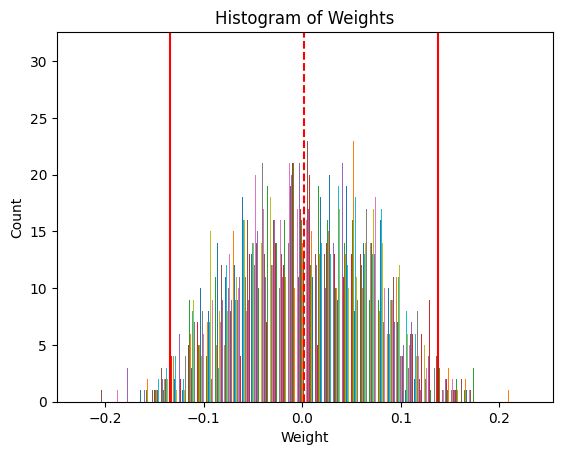

In [54]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [55]:
weight = weights.T
weight

array([[ 0.00607142, -0.06928858, -0.07850613, ...,  0.04691599,
        -0.08201995, -0.09944615],
       [ 0.03319457, -0.01119329, -0.03358087, ..., -0.13919887,
        -0.04336367,  0.04137059],
       [ 0.09249348, -0.14844   ,  0.04993893, ...,  0.08340651,
         0.14011903,  0.09086686],
       ...,
       [-0.02048949, -0.04082102, -0.11242918, ..., -0.08070793,
         0.08961114,  0.07048485],
       [ 0.0293796 , -0.00315093,  0.07394056, ..., -0.08429417,
        -0.0395025 , -0.08208229],
       [ 0.02225111,  0.117134  , -0.03252342, ..., -0.02769043,
         0.14684509,  0.03213551]], dtype=float32)

In [56]:
weight.shape

(65, 324)

In [57]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[0]):
        weight_mean = np.mean(weight[i,:])
        weight_std = np.std(weight[i,:])
        threshold = weight_mean + 1.1* weight_std
        nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
        ten_percent_nodes = int(0.1 * weight.shape[1])
        if nodes_with_weight_above_threshold >= ten_percent_nodes:
            num.append(nodes_with_weight_above_threshold)
            print(i,nodes_with_weight_above_threshold,threshold)

    return num



In [58]:
 we= Tweights(weight)

0 43 0.07754444889724255
1 54 0.07970626968890429
2 47 0.06951823821291328
3 48 0.07399186482653022
4 45 0.08118175994604826
5 51 0.06723862187936902
6 51 0.0816696266643703
7 49 0.074330364249181
8 49 0.07256259490386584
9 54 0.07421393394470216
10 44 0.07779251243919134
11 44 0.06992878606542946
12 50 0.07954483567737043
13 50 0.07750950555782765
14 50 0.07204731153324247
15 57 0.07342289071530105
16 46 0.07792761083692312
17 51 0.08237145720049739
18 49 0.0798091714270413
19 50 0.07433586311526597
20 53 0.08220439786091448
21 53 0.08373030573129654
22 41 0.06918925861828029
23 50 0.07527913651429118
24 40 0.06715746177360415
25 49 0.07369568161084317
26 39 0.07169633547309787
27 43 0.08327906411141157
28 50 0.08027872531674803
29 52 0.0737121983896941
30 45 0.08022597958333791
31 48 0.07806081522721797
32 49 0.08312736153602601
33 46 0.0850060421973467
34 49 0.07912246407940984
35 43 0.07694843667559326
36 42 0.07737416876479984
37 49 0.07884037215262651
38 50 0.07033061259426177
39

In [59]:
len(we)

65

In [60]:
pred = np.zeros((65,708))
for i in range(weight.shape[0]):
    weight_mean = np.mean(weight[i,:])
    weight_std = np.std(weight[i,:])
    threshold = weight_mean + 1.1* weight_std
    nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
    ten_percent_nodes = int(0.1 * weight.shape[1])
    if nodes_with_weight_above_threshold >= ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weight.shape[1]):
                weight_value = weight[i,j]
                if weight_value > threshold:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[ 0.13492848  0.01283936  0.09559333 ...  0.55549819  0.4747072
   0.37463989]
 [ 0.12305504 -0.07719756  0.04130901 ...  0.36279759  0.38963772
   0.20968243]
 [ 0.09153367  0.04297863 -0.10274643 ...  0.36940746  0.31797481
   0.10940326]
 ...
 [ 0.06606559 -0.09102304 -0.05962583 ...  0.60795114  0.51989603
   0.34169846]
 [ 0.05255222 -0.00848573 -0.09300672 ...  0.31826303  0.22104523
   0.11819345]
 [ 0.05887485 -0.08117072  0.00264188 ...  0.35096589  0.49400766
   0.34994168]]


In [61]:
number_of_zeros = np.count_nonzero( pred == 0)

In [62]:
number_of_zeros

0

In [63]:
pred.shape

(65, 708)

In [64]:
predd = pred[0,:].reshape(59,12)
predd

array([[ 1.34928477e-01,  1.28393585e-02,  9.55933256e-02,
        -1.20637456e-01, -7.99315081e-02,  2.60135075e-02,
        -2.56106828e-02, -2.34111695e-02, -5.10820701e-02,
        -1.08736678e-01, -1.39302427e-01,  7.87291790e-02],
       [ 1.51665116e-01,  5.43067516e-02, -5.05692251e-02,
         6.71247231e-02,  8.16138574e-02,  2.38306677e-02,
         1.73246506e-02,  3.12321389e-03, -8.91572337e-02,
        -9.46248400e-02,  3.23037146e-02, -1.73061648e-01],
       [ 1.10334019e-01,  2.14237302e-02, -2.04238797e-01,
        -2.05212581e-01, -6.83224151e-02, -4.31652510e-02,
        -8.32619908e-02, -1.87654543e-01, -5.43094571e-02,
        -1.24787629e-01, -1.58605946e-01,  7.89447708e-04],
       [-1.15727968e-01, -7.05278259e-02, -2.63241906e-01,
        -1.28812382e-01, -1.08635762e-01,  7.64600427e-03,
        -4.50771434e-02, -1.49966363e-01, -4.30510968e-02,
        -9.80187055e-03, -1.42741999e-01, -1.21658936e-01],
       [-8.25462248e-02,  5.03826901e-02,  6.5630975

In [65]:
df = pd.read_csv("enso_index.csv")
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95


In [66]:
df['avg'] = df[['jun', 'jul', 'aug', 'sep']].mean(axis=1)

In [67]:
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,avg
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62,27.1400
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18,26.4550
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22,26.8150
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97,26.6325
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67,26.5275
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62,27.5700
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23,25.9600
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96,27.9925
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03,26.9300
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95,26.6850


In [68]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_pred = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 6:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_pred.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_pred[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation, highest_correlation_index, abs(highest_correlation)))
        print(i,highest_correlation,highest_correlation_index,abs(highest_correlation))
    return top_pred
        
    

In [69]:
top_pred = potential_predictors_new(pred)

0 0.24370275966104776 May 0.24370275966104776
1 0.21590615542187597 July 0.21590615542187597
2 0.25981134925463306 August 0.25981134925463306
3 0.12799632492510762 November 0.12799632492510762
4 0.2300906678425251 August 0.2300906678425251
5 -0.13158908611215775 February 0.13158908611215775
6 0.1944442888913886 August 0.1944442888913886
7 0.13013458039625245 August 0.13013458039625245
8 0.20744336388405504 August 0.20744336388405504
9 0.20497417490074382 November 0.20497417490074382
10 0.14755430159401386 July 0.14755430159401386
11 0.15762347086187317 March 0.15762347086187317
12 0.22866483420142053 November 0.22866483420142053
13 0.20757153926733293 May 0.20757153926733293
14 0.1968078284048213 August 0.1968078284048213
15 0.2064646539847238 May 0.2064646539847238
16 0.2049095137952501 March 0.2049095137952501
17 0.14208637279936087 August 0.14208637279936087
18 0.1653145458423367 August 0.1653145458423367
19 0.15279747488168482 May 0.15279747488168482
20 0.17054704255424794 May 0.17

In [70]:
top_pred

,May,July,August,November,August_2,February,August_3,August_4,August_5,November_2,...,March_4,May_11,November_10,November_11,August_24,November_12,July_8,August_25,November_13,August_26
0,-0.079932,-0.053597,0.021256,-0.122092,-0.230090,0.045982,0.047717,-0.087840,-0.032661,-0.219382,...,-0.088399,-0.004253,-0.055003,-0.184320,-0.178714,-0.087153,-0.032761,-0.189718,-0.050559,-0.105262
1,0.081614,-0.053597,0.021256,-0.122092,-0.230090,-0.170259,0.047717,-0.087840,-0.032661,-0.219382,...,0.100036,0.073885,-0.055003,-0.184320,-0.178714,-0.087153,-0.032761,-0.189718,-0.050559,-0.105262
2,-0.068322,-0.067882,-0.187316,-0.011686,-0.172852,-0.094686,-0.140425,-0.123819,-0.132462,-0.078582,...,-0.285796,-0.059288,-0.069829,0.017623,-0.199480,0.103017,-0.075118,-0.275193,-0.085805,-0.155521
3,-0.108636,-0.270609,-0.255083,-0.195252,-0.276161,-0.182001,-0.384909,-0.225540,-0.086739,-0.311076,...,-0.065714,-0.096203,-0.288196,-0.224965,-0.340662,-0.283414,-0.101857,-0.196935,-0.146297,-0.074078
4,-0.167627,-0.118002,-0.166771,-0.119151,-0.129418,-0.172496,-0.250902,-0.170284,-0.205732,-0.206272,...,-0.057300,-0.221543,-0.106532,-0.189887,-0.163016,-0.125243,-0.118789,-0.164824,-0.110041,-0.111180
5,-0.086838,-0.259944,-0.206896,-0.012307,-0.134959,-0.116741,-0.194923,-0.151202,-0.208472,-0.056770,...,-0.229308,-0.039158,-0.042187,0.001390,-0.252250,-0.034723,-0.062778,-0.180555,-0.013448,-0.101220
6,-0.213596,-0.101425,-0.135722,-0.035171,-0.073918,-0.016781,-0.162519,-0.093812,-0.062459,-0.307270,...,-0.277479,-0.237389,-0.074255,-0.285362,-0.103426,-0.086154,-0.104444,-0.206398,-0.085236,-0.108168
7,-0.078332,-0.158889,-0.088308,-0.264661,-0.185269,-0.126412,-0.055200,-0.250436,-0.216417,-0.334589,...,-0.171814,-0.131510,-0.154503,-0.355989,-0.194145,-0.252302,-0.078030,-0.209455,-0.206745,-0.120451
8,-0.131836,-0.184006,-0.284059,-0.016677,-0.177809,-0.015848,-0.525076,-0.195251,-0.208125,0.001506,...,-0.163298,-0.173096,-0.034547,-0.035780,-0.383452,-0.032528,-0.248501,-0.223202,-0.136379,-0.083811
9,-0.009411,-0.101705,-0.258328,-0.037244,-0.248429,-0.315851,-0.429308,-0.211054,-0.188526,-0.088138,...,-0.093757,-0.042284,-0.063342,-0.136994,-0.367299,-0.017266,-0.153990,-0.357479,-0.020732,-0.151342


In [71]:
#top_pred.to_csv('monthly values.csv', index=False)

In [88]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_predk = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 6:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='kendall')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_predk.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_predk[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation, highest_correlation_index, abs(highest_correlation)))
        print(i,highest_correlation,highest_correlation_index,abs(highest_correlation))
    return top_predk
        
    

In [89]:
top_predk = potential_predictors_new(pred)

0 0.19473687540386647 May 0.19473687540386647
1 0.1415618662480939 July 0.1415618662480939
2 0.16028079071065177 August 0.16028079071065177
3 0.08891489119714989 November 0.08891489119714989
4 0.16379058904738136 August 0.16379058904738136
5 -0.10233919878581571 February 0.10233919878581571
6 0.10818715300214804 May 0.10818715300214804
7 0.10529395010188802 October 0.10529395010188802
8 0.1397661057703426 May 0.1397661057703426
9 0.1415618662480939 November 0.1415618662480939
10 0.10467838047234866 March 0.10467838047234866
11 0.1134834795542571 July 0.1134834795542571
12 0.1310324712379051 November 0.1310324712379051
13 0.15146201420300726 May 0.15146201420300726
14 0.11816321066989656 July 0.11816321066989656
15 0.1678362860087378 May 0.1678362860087378
16 0.13922200069027416 December 0.13922200069027416
17 0.12869260568008536 July 0.12869260568008536
18 0.10116960794254926 April 0.10116960794254926
19 0.12807019733767797 May 0.12807019733767797
20 0.11754387974827978 May 0.117543879

In [95]:
top_predk.columns

Index(['May', 'July', 'August', 'November', 'August_2', 'February', 'May_2',
       'October', 'May_3', 'November_2', 'March', 'July_2', 'November_3',
       'May_4', 'July_3', 'May_5', 'December', 'July_4', 'April', 'May_6',
       'May_7', 'August_3', 'July_5', 'May_8', 'May_9', 'November_4', 'May_10',
       'August_4', 'August_5', 'September', 'May_11', 'January', 'November_5',
       'May_12', 'August_6', 'May_13', 'August_7', 'May_14', 'July_6',
       'May_15', 'April_2', 'August_8', 'November_6', 'August_9', 'August_10',
       'July_7', 'July_8', 'May_16', 'July_9', 'May_17', 'July_10', 'May_18',
       'July_11', 'July_12', 'August_11', 'May_19', 'May_20', 'July_13',
       'July_14', 'August_12', 'November_7', 'July_15', 'August_13',
       'November_8', 'August_14'],
      dtype='object')

In [96]:
top_predk.to_csv('kendall_corr.csv', index=False)

In [92]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 6:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='spearman')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation, highest_correlation_index, abs(highest_correlation)))
        print(i,highest_correlation,highest_correlation_index,abs(highest_correlation))
    return top_preds
        
    

In [93]:
top_preds = potential_predictors_new(pred)

0 0.2840234958400329 May 0.2840234958400329
1 0.19918758592917626 May 0.19918758592917626
2 0.24741002676633364 August 0.24741002676633364
3 0.12212691966176568 November 0.12212691966176568
4 0.22666101672568909 August 0.22666101672568909
5 -0.1301031591192331 February 0.1301031591192331
6 0.16283351361463763 May 0.16283351361463763
7 0.15742946068866517 October 0.15742946068866517
8 0.2075747392686237 May 0.2075747392686237
9 0.20670105354574508 November 0.20670105354574508
10 0.16046875230025254 July 0.16046875230025254
11 0.16251442934651328 July 0.16251442934651328
12 0.1955082777069185 November 0.1955082777069185
13 0.22239106938395414 May 0.22239106938395414
14 0.16172538248581272 November 0.16172538248581272
15 0.2334083404953537 May 0.2334083404953537
16 0.1912415798675747 December 0.1912415798675747
17 0.1795519967460848 July 0.1795519967460848
18 0.14237704205500978 May 0.14237704205500978
19 0.1909465502437262 May 0.1909465502437262
20 0.16087553705107327 May 0.1608755370510

In [97]:
top_preds

,May,May_2,August,November,August_2,February,May_3,October,May_4,November_2,...,May_21,May_22,July_12,July_13,August_12,May_23,July_14,August_13,November_9,July_15
0,-0.079932,-0.002933,0.021256,-0.122092,-0.230090,0.045982,-0.036586,-0.084780,-0.041642,-0.219382,...,-0.043514,-0.004253,-0.074875,0.053986,-0.178714,-0.020570,-0.032761,-0.189718,-0.050559,0.012804
1,0.081614,-0.129494,0.021256,-0.122092,-0.230090,-0.170259,-0.057782,-0.084780,-0.015616,-0.219382,...,-0.034958,0.073885,-0.074875,0.053986,-0.178714,-0.098603,-0.032761,-0.189718,-0.050559,0.012804
2,-0.068322,-0.067151,-0.187316,-0.011686,-0.172852,-0.094686,-0.125806,-0.179042,-0.035829,-0.078582,...,-0.112758,-0.059288,-0.109896,-0.216901,-0.199480,-0.050629,-0.075118,-0.275193,-0.085805,-0.072630
3,-0.108636,-0.130265,-0.255083,-0.195252,-0.276161,-0.182001,-0.324538,-0.169479,-0.190831,-0.311076,...,-0.215553,-0.096203,-0.189859,-0.176275,-0.340662,-0.274236,-0.101857,-0.196935,-0.146297,-0.128593
4,-0.167627,-0.308933,-0.166771,-0.119151,-0.129418,-0.172496,-0.388535,-0.143456,-0.260715,-0.206272,...,-0.177431,-0.221543,-0.024957,-0.108930,-0.163016,-0.231378,-0.118789,-0.164824,-0.110041,-0.049643
5,-0.086838,-0.281630,-0.206896,-0.012307,-0.134959,-0.116741,-0.204888,-0.125633,-0.218245,-0.056770,...,-0.039534,-0.039158,-0.117413,-0.272795,-0.252250,-0.166961,-0.062778,-0.180555,-0.013448,-0.127291
6,-0.213596,-0.266491,-0.135722,-0.035171,-0.073918,-0.016781,-0.218798,-0.203201,-0.322866,-0.307270,...,-0.198868,-0.237389,-0.166476,0.010712,-0.103426,-0.342455,-0.104444,-0.206398,-0.085236,-0.019161
7,-0.078332,-0.216792,-0.088308,-0.264661,-0.185269,-0.126412,-0.127785,-0.228951,-0.119553,-0.334589,...,-0.148537,-0.131510,0.004161,0.006725,-0.194145,-0.227067,-0.078030,-0.209455,-0.206745,-0.003237
8,-0.131836,-0.154938,-0.284059,-0.016677,-0.177809,-0.015848,-0.263416,-0.174562,-0.221655,0.001506,...,-0.099208,-0.173096,-0.124332,-0.290169,-0.383452,-0.161294,-0.248501,-0.223202,-0.136379,-0.210268
9,-0.009411,-0.144977,-0.258328,-0.037244,-0.248429,-0.315851,-0.032895,-0.185577,-0.016406,-0.088138,...,0.067639,-0.042284,-0.177353,-0.233955,-0.367299,-0.015103,-0.153990,-0.357479,-0.020732,-0.118609


In [98]:
top_preds.to_csv('spearman_corr.csv', index=False)